In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from scipy import linalg

In [2]:
def btcs(T0, nt, dt, delta, alpha, Tb):
    ny, nx = T0.shape
    M, N = nx - 2, ny - 2
    sigma = alpha * dt / delta**2
    A = lhs_operator(M, N, sigma)
    T = T0[1:-1, 1:-1].flatten()
    I, J = int(M / 2), int(N / 2)
    for n in range(nt):
        b = rhs_vector(T, M, N, sigma, Tb)
        T = linalg.solve(A, b)
        if T[J * M + I] >= 70.0:
            break
    print('Time step {}; temperature at center is {} C'.format(n, T[J * M + I]))
    return map_1d_to_2d(T, nx, ny, Tb)

In [3]:
def map_1d_to_2d(T1, nx, ny, Tb):
    T = numpy.zeros((ny, nx))
    T[1:-1, 1:-1] = T1.reshape((ny - 2, nx - 2))
    T[:, 0] = Tb
    T[0, :] = Tb
    T[:, -1] = T[:, -2]
    T[-1, :] = T[-2, :]
    return T 

In [4]:
def rhs_vector(T, M, N, sigma, Tb):
    b = T / sigma
    for j in range(N):
        for i in range(M):
            I = j * M + i
            if i == 0:
                b[I] += Tb
            if j == 0:
                b[I] += Tb
    return b

In [5]:
def lhs_operator(M, N, sigma):
    A = numpy.zeros((M * N, M * N))
    for j in range(N):
        for i in range(M):
            I = j * M + i
            IS = I - M
            IW = I - 1
            IE = I + 1
            IN = I + M
            if i == 0 and j == 0:
                A[I, I] = 1.0 / sigma + 4.0
                A[I, IE] = -1.0
                A[I, IN] = -1.0
            elif i == M - 1 and j == 0:
                A[I, I] = 1.0 / sigma + 3.0
                A[I, IW] = -1.0
                A[I, IN] = -1.0
            elif i == 0 and j == N - 1:
                A[I, I] = 1.0 / sigma + 3.0
                A[I, IS] = -1.0
                A[I, IE] = -1.0
            elif i == M - 1 and j == N - 1:
                A[I, I] = 1.0 / sigma + 2.0
                A[I, IW] = -1.0
                A[I, IS] = -1.0 
            elif i == 0:
                A[I, I] = 1.0 / sigma + 4.0
                A[I, IS] = -1.0
                A[I, IE] = -1.0
                A[I, IN] = -1.0
            elif j == 0:
                A[I, I] = 1.0 / sigma + 4.0
                A[I, IN] = -1.0
                A[I, IE] = -1.0
                A[I, IW] = -1.0
            elif j == N - 1:
                A[I, I] = 1.0 / sigma + 3.0
                A[I, IS] = -1.0
                A[I, IW] = -1.0
                A[I, IE] = -1.0
            elif i == M - 1:
                A[I, I] = 1.0 / sigma + 3.0
                A[I, IS] = -1.0
                A[I, IW] = -1.0
                A[I, IN] = -1.0
            else:
                A[I, I] = 1.0 / sigma + 4.0
                A[I, IS] = -1.0
                A[I, IW] = -1.0
                A[I, IN] = -1.0
                A[I, IE] = -1.0
    return A  

In [6]:
Lx = 0.01 
Ly = 0.01 
nx = 21 
ny = 21 
dx = Lx / (nx - 1)  
dy = Ly / (ny - 1)  
alpha = 1e-4  


x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)


Tb = 100.0  
T0 = 20.0 * numpy.ones((ny, nx))
T0[:, 0] = Tb
T0[0, :] = Tb

In [7]:
sigma = 0.25
dt = sigma * min(dx, dy)**2 / alpha  # time-step size
nt = 300  # number of time steps to compute

# Compute the temperature along the rod.
T = btcs(T0, nt, dt, dx, alpha, Tb)

Time step 256; temperature at center is 70.00387455599677 C


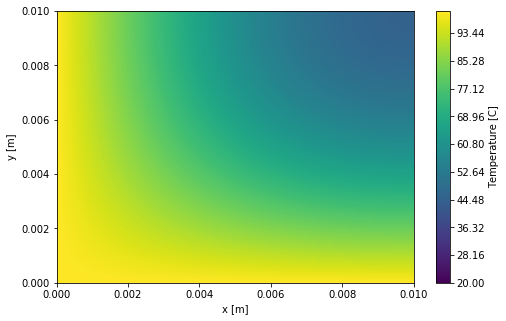

In [10]:
pyplot.figure(figsize=(8.0, 5.0))
pyplot.xlabel('x [m]')
pyplot.ylabel('y [m]')
levels = numpy.linspace(20.0, 100.0, num=501)
contf = pyplot.contourf(x, y, T, levels=levels)
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature [C]')